## Data Exploration

In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from geopandas import GeoDataFrame
from shapely.geometry import Point, Polygon
import contextily as cx


In [5]:
kc_house_df = pd.read_csv('../data/kc_house_data.csv')
kc_house_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [6]:
kc_house_df['date']

0        10/13/2014
1         12/9/2014
2         2/25/2015
3         12/9/2014
4         2/18/2015
            ...    
21592     5/21/2014
21593     2/23/2015
21594     6/23/2014
21595     1/16/2015
21596    10/15/2014
Name: date, Length: 21597, dtype: object

In [7]:
kc_house_df[kc_house_df.duplicated(subset= 'id') == True]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
94,6021501535,12/23/2014,700000.0,3,1.50,1580,5000,1.0,NO,NONE,...,8 Good,1290,290.0,1939,0.0,98117,47.6870,-122.386,1570,4500
314,4139480200,12/9/2014,1400000.0,4,3.25,4290,12103,1.0,NO,GOOD,...,11 Excellent,2690,1600.0,1997,0.0,98006,47.5503,-122.102,3860,11244
325,7520000520,3/11/2015,240500.0,2,1.00,1240,12092,1.0,NO,NONE,...,6 Low Average,960,280.0,1922,1984.0,98146,47.4957,-122.352,1820,7460
346,3969300030,12/29/2014,239900.0,4,1.00,1000,7134,1.0,NO,NONE,...,6 Low Average,1000,0.0,1943,NaN,98178,47.4897,-122.240,1020,7138
372,2231500030,3/24/2015,530000.0,4,2.25,2180,10754,1.0,NO,NONE,...,7 Average,1100,1080.0,1954,0.0,98133,47.7711,-122.341,1810,6929
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20165,7853400250,2/19/2015,645000.0,4,3.50,2910,5260,2.0,NO,NONE,...,9 Better,2910,0.0,2012,0.0,98065,47.5168,-121.883,2910,5260
20597,2724049222,12/1/2014,220000.0,2,2.50,1000,1092,2.0,NO,NONE,...,7 Average,990,10.0,2004,0.0,98118,47.5419,-122.271,1330,1466
20654,8564860270,3/30/2015,502000.0,4,2.50,2680,5539,2.0,NaN,NONE,...,8 Good,2680,0.0,2013,0.0,98045,47.4759,-121.734,2680,5992
20764,6300000226,5/4/2015,380000.0,4,1.00,1200,2171,1.5,NO,NONE,...,7 Average,1200,0.0,1933,0.0,98133,47.7076,-122.342,1130,1598


In [8]:
kc_house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [9]:
kc_house_df[kc_house_df['id'] == 8564860270 ]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
20653,8564860270,7/8/2014,449990.0,4,2.5,2680,5539,2.0,NO,NONE,...,8 Good,2680,0.0,2013,0.0,98045,47.4759,-121.734,2680,5992
20654,8564860270,3/30/2015,502000.0,4,2.5,2680,5539,2.0,NaN,NONE,...,8 Good,2680,0.0,2013,0.0,98045,47.4759,-121.734,2680,5992


In [10]:
kc_house_df["date"] = pd.to_datetime(kc_house_df["date"])

kc_house_df['date'].dt.year.value_counts()

2014    14622
2015     6975
Name: date, dtype: int64

In [11]:
print( kc_house_df['yr_built'].min() )
print( kc_house_df['yr_built'].max() )

1900
2015


In [12]:
house_sold_2014 = kc_house_df[kc_house_df['date'].dt.year == 2014]
house_sold_2015 = kc_house_df[kc_house_df['date'].dt.year == 2015]

In [13]:
house_sold_2014['date'].dt.month.value_counts()

7     2211
6     2178
8     1939
10    1876
9     1771
5     1768
12    1470
11    1409
Name: date, dtype: int64

In [14]:
house_sold_2015['date'].dt.month.value_counts()

4    2229
3    1875
2    1247
1     978
5     646
Name: date, dtype: int64

In [15]:
house_sold_2015['yr_renovated']

2        NaN
4        0.0
7        0.0
8        0.0
9        0.0
        ... 
21588    0.0
21590    0.0
21591    0.0
21593    0.0
21595    0.0
Name: yr_renovated, Length: 6975, dtype: float64

In [16]:
house_sold_2015

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2,5631500400,2015-02-25,180000.0,2,1.0,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
4,1954400510,2015-02-18,510000.0,3,2.0,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
7,2008000270,2015-01-15,291850.0,3,1.5,1060,9711,1.0,NO,NaN,...,7 Average,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711
8,2414600126,2015-04-15,229500.0,3,1.0,1780,7470,1.0,NO,NONE,...,7 Average,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
9,3793500160,2015-03-12,323000.0,3,2.5,1890,6560,2.0,NO,NONE,...,7 Average,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21588,9834201367,2015-01-26,429000.0,3,2.0,1490,1126,3.0,NO,NONE,...,8 Good,1490,0.0,2014,0.0,98144,47.5699,-122.288,1400,1230
21590,7936000429,2015-03-26,1010000.0,4,3.5,3510,7200,2.0,NO,NONE,...,9 Better,2600,910.0,2009,0.0,98136,47.5537,-122.398,2050,6200
21591,2997800021,2015-02-19,475000.0,3,2.5,1310,1294,2.0,NO,NONE,...,8 Good,1180,130.0,2008,0.0,98116,47.5773,-122.409,1330,1265
21593,6600060120,2015-02-23,400000.0,4,2.5,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200


<AxesSubplot:>

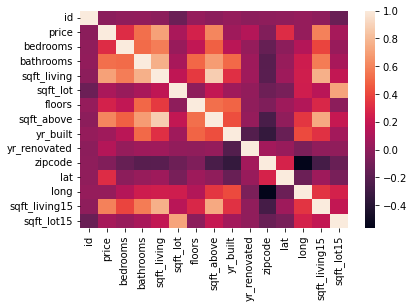

In [17]:
sns.heatmap(kc_house_df.corr())

In [18]:
kc_house_df['zipcode'].value_counts()

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [19]:
house_sold_2015

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2,5631500400,2015-02-25,180000.0,2,1.0,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
4,1954400510,2015-02-18,510000.0,3,2.0,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
7,2008000270,2015-01-15,291850.0,3,1.5,1060,9711,1.0,NO,NaN,...,7 Average,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711
8,2414600126,2015-04-15,229500.0,3,1.0,1780,7470,1.0,NO,NONE,...,7 Average,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
9,3793500160,2015-03-12,323000.0,3,2.5,1890,6560,2.0,NO,NONE,...,7 Average,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21588,9834201367,2015-01-26,429000.0,3,2.0,1490,1126,3.0,NO,NONE,...,8 Good,1490,0.0,2014,0.0,98144,47.5699,-122.288,1400,1230
21590,7936000429,2015-03-26,1010000.0,4,3.5,3510,7200,2.0,NO,NONE,...,9 Better,2600,910.0,2009,0.0,98136,47.5537,-122.398,2050,6200
21591,2997800021,2015-02-19,475000.0,3,2.5,1310,1294,2.0,NO,NONE,...,8 Good,1180,130.0,2008,0.0,98116,47.5773,-122.409,1330,1265
21593,6600060120,2015-02-23,400000.0,4,2.5,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200


In [119]:
#def map_houses(df, marker_size, alpha_value):
usa = gpd.read_file('../data/maps/geo_export_565ad28e-2cfc-455f-814f-82dcc95d90f3.shp') 

geometry = [Point(xy) for xy in zip(df['long'], df['lat'])]
gdf = GeoDataFrame(df, geometry=geometry)  
ax = gdf.plot(ax=usa[usa.state_abbr == 'WA'].plot(figsize= (20,16)), color='red', markersize= marker_size, alpha= alpha_value)
cx.add_basemap(ax)

minx = -122.619
miny = 47.1559
maxx = -121.315
maxy = 47.7776
ax.set_xlim(minx-.1, maxx+.01)
ax.set_ylim(miny-.01, maxy+.01);

CRSError: Invalid projection: epsg:4326: (Internal Proj Error: proj_create: SQLite error on SELECT name, type, coordinate_system_auth_name, coordinate_system_code, datum_auth_name, datum_code, area_of_use_auth_name, area_of_use_code, text_definition, deprecated FROM geodetic_crs WHERE auth_name = ? AND code = ?: no such column: area_of_use_auth_name)

In [120]:
usa.crs
#

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [126]:
usa_wm = usa.to_crs(epsg=3857)

CRSError: Invalid projection: epsg:3857: (Internal Proj Error: proj_create: SQLite error on SELECT name, coordinate_system_auth_name, coordinate_system_code, geodetic_crs_auth_name, geodetic_crs_code, conversion_auth_name, conversion_code, area_of_use_auth_name, area_of_use_code, text_definition, deprecated FROM projected_crs WHERE auth_name = ? AND code = ?: no such column: area_of_use_auth_name)

In [111]:
map_houses(house_sold_2014[house_sold_2014['waterfront'] == 'YES'], 20, .4)

CRSError: Invalid projection: epsg:4326: (Internal Proj Error: proj_create: SQLite error on SELECT name, type, coordinate_system_auth_name, coordinate_system_code, datum_auth_name, datum_code, area_of_use_auth_name, area_of_use_code, text_definition, deprecated FROM geodetic_crs WHERE auth_name = ? AND code = ?: no such column: area_of_use_auth_name)

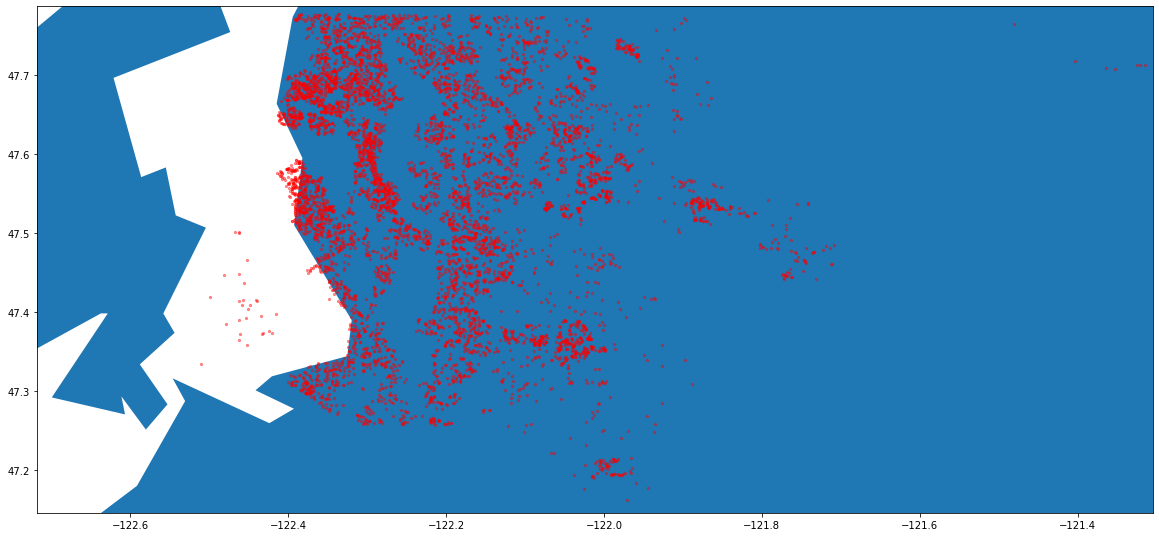

In [108]:
map_houses(house_sold_2015, 5, .4)

In [60]:
washington = gpd.read_file('../data\maps\WAOFM_SAEP_Population_Estimates_WFL1.shp') 

(47.145900000000005, 47.7876)

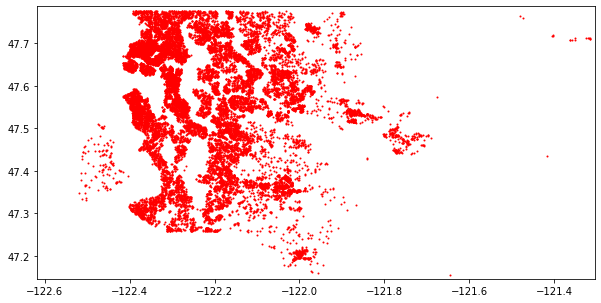

In [65]:
ax = gdf.plot(ax=washington.plot(figsize=(10, 6)), color='red', markersize=1);
minx, miny, maxx, maxy = gdf.total_bounds
ax.set_xlim(minx-.1, maxx+.01)
ax.set_ylim(miny-.01, maxy+.01)